# Intel Core Processors - Analysis (Part 1)

**Hello and welcome to the 1st part of analysis of Intel Core Processors!**

For more than 10 years, most home computer users are pleased to use these kind of Intel processors for general purposes. Surely, lots of generations have been revealed in order to satisfy up-to-date performance, be it the entry-level or high-end. Here, we are going to analyze these processors altogether to gain some insights!

So, we're ready now, and let's load the necessary modules and the dataset that holds all Core processors ever produced:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
intel_core = pd.read_csv('intel_core_processors_v1_1.csv', na_values='N/A')

First of all, how many different processors do we have in the dataset?

In [3]:
intel_core.shape[0]

885

Hmmm, that's a lot! I think the number is enough to perform analyses. Then, which features (columns) are available?

In [4]:
intel_core.columns

Index(['Product', 'Status', 'Release Date', 'Cores', 'Max. Turbo Freq.(GHz)',
       'Base Freq.(GHz)', 'Cache(MB)', 'Cache Info', 'Integrated Graphics'],
      dtype='object')

**Total of 9 features.** Well, although some other important features are missing, such as _# of threads, TDP, architecture name, litography,_ etc., the existing ones are still useful for analyses and should not hinder us.

OK, let's start something simple: The **status** of these processors that only take specific strings:

In [5]:
intel_core['Status'].unique()

array(['Launched', 'Discontinued', 'Announced'], dtype=object)

**Launched** should mean that the processor is available for purchase in the technology market and/or inside PCs or notebooks via contracted manufacturers.

Likewise, **Discontinued** should indicate that the processor is no longer sold and Intel has stopped producing it.

Plus, **Announced** processors are yet to be released in the market in a predefined date.

Here, let's create a **bar plot** to get the total count for each:

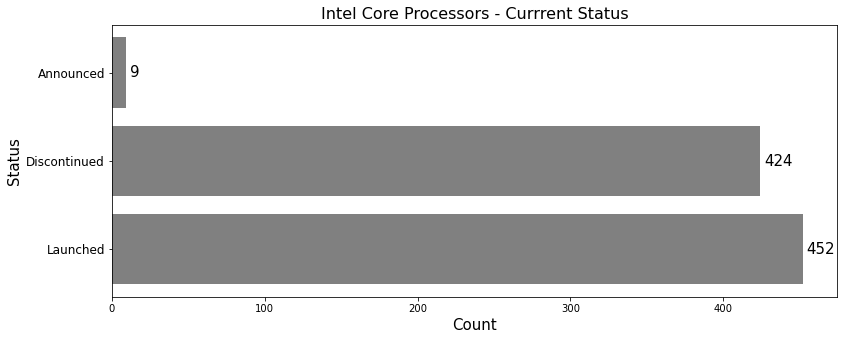

In [6]:
status_counts = intel_core['Status'].value_counts()
plt.figure(figsize=(13,5))
plt.barh(y=status_counts.index, width=status_counts, color='gray')
plt.title('Intel Core Processors - Currrent Status', fontsize=16)
for i in range(3):
    plt.text(status_counts[i]+2.5,i-0.05,status_counts[i], fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Status', fontsize=15)
plt.yticks(fontsize=12)
plt.show()

There are **452** Core processors that are released or available in the market for a long time; that should account for more than half of the total number. Moreover, **more than 400** processors were discontinued and you can barely see them for sale in the second-hand markets.

Interestingly, only **9** processors have been marked as Announced. Well, what are they?

In [7]:
intel_core[intel_core['Status'] == 'Announced'][['Product', 'Release Date']]

,Product,Release Date
62,Core i7-1160G7,Q3'20
98,Core i7-8809G with Radeon RX Vega M GH Graphics,Q1'18
100,Core i7-8709G with Radeon RX Vega M GH Graphics,Q1'18
103,Core i7-8705G with Radeon RX Vega M GL Graphics,Q1'18
215,Core i5-1130G7,Q3'20
271,Core i5-8305G with Radeon RX Vega M GL Graphics,Q1'18
389,Core i3-1125G4,Q3'20
390,Core i3-1120G4,Q3'20
394,Core i3-1110G4,Q3'20


Oh! Some processors from the newest generations (i.e. 11th gen.) that are planned to be released in the **3rd quarter of 2020**. The remaining ones are from the 8th generation with **Radeon RX Vega M GH/GL** graphics... To be honest, I've never seen such a processor with graphic component from Intel's rival, AMD!

Speaking of release dates, you may understand that these for each processor in Intel Ark website are determined as **quarterly periods**. At this point, it's convenient to create another **bar plot** to see how many individual processors have been produced within each quarter:

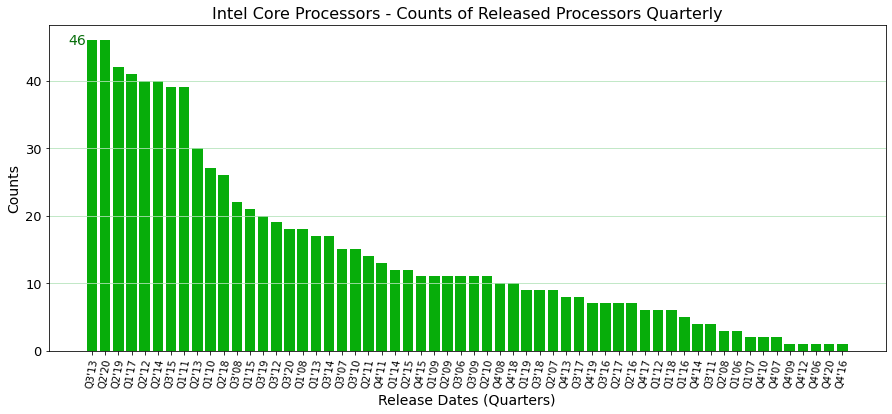

In [8]:
plt.figure(figsize=(15,6))
release_date_counts = intel_core['Release Date'].value_counts()
plt.bar(x=release_date_counts.index, height=release_date_counts, color='#07ad0a')
plt.text(-1.8, release_date_counts[0]-0.6, release_date_counts[0], fontsize=14, color='#076d0a')
plt.title('Intel Core Processors - Counts of Released Processors Quarterly', fontsize=16)
plt.xlabel('Release Dates (Quarters)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=80)
plt.yticks(fontsize=13)
plt.grid(axis='y', color='#b3e3ba')
plt.show()

Whoa! There are **46 processors** that were released in the **3rd quarter of 2013** (i.e. 7 years ago), besides the 2nd quarter of 2020, sharing the same number! I wonder which of them are...

In [9]:
intel_core[intel_core['Release Date'] == "Q3'13"] \
[['Product', 'Status', 'Cores', 'Max. Turbo Freq.(GHz)', 'Base Freq.(GHz)']].head(20)

,Product,Status,Cores,Max. Turbo Freq.(GHz),Base Freq.(GHz)
27,Core i7-4960X Extreme Edition,Discontinued,6,4.0,3.6
29,Core i7-4930K,Discontinued,6,3.9,3.4
31,Core i7-4820K,Discontinued,4,3.9,3.7
165,Core i7-4950HQ,Launched,4,3.6,2.4
170,Core i7-4850HQ,Launched,4,3.5,2.3
186,Core i7-4750HQ,Launched,4,3.2,2.0
197,Core i7-4771,Discontinued,4,3.9,3.5
203,Core i7-4600U,Launched,2,3.3,2.1
205,Core i7-4610Y,Launched,2,2.9,1.7
206,Core i7-4650U,Launched,2,3.3,1.7


Hmmm, the year 2013 is for the **4th generation** of Core processors we can imply. Some of them are still available in stocks it seems; some of them, of course, are discontinued.

_Note: Due to space limitation, I only listed the first 20 processors above._

On the other hand, there are **five** different quarters where Intel had released **just 1** processor. Let's see tham all with the details:

In [10]:
least_released_dates = ["Q4'20", "Q4'12", "Q4'16", "Q4'06", "Q4'09"]
intel_core[intel_core['Release Date'].isin(least_released_dates)]

,Product,Status,Release Date,Cores,Max. Turbo Freq.(GHz),Base Freq.(GHz),Cache(MB),Cache Info,Integrated Graphics
32,Core i7-3970X Extreme Edition,Discontinued,Q4'12,6,4.00,3.50,15.0,Intel Smart Cache,NaN
402,Core i3-10100F,Launched,Q4'20,4,4.30,3.60,6.0,Intel Smart Cache,NaN
458,Core i3-6006U,Launched,Q4'16,2,NaN,2.00,3.0,Intel Smart Cache,Intel HD 520 Graphics
535,Core2 QX6700 Extreme,Discontinued,Q4'06,4,NaN,2.66,8.0,L2 Cache,NaN
685,Core i7-960,Discontinued,Q4'09,4,3.46,3.20,8.0,Intel Smart Cache,NaN


One remarkable fact above is that Core i3-10100F is the only available processor that has been released in **the last quarter of 2020**!

Now, in different aspect, how about taking these processors' release dates to be in **yearly periods** and counting them all again? _This will require a little data wrangling, but it should work..._

In [11]:
def convert_to_year(date):
    if type(date) == float:
        return None
    return str(20) + date[-2:]
intel_core['Release Year'] = intel_core['Release Date'].apply(convert_to_year)

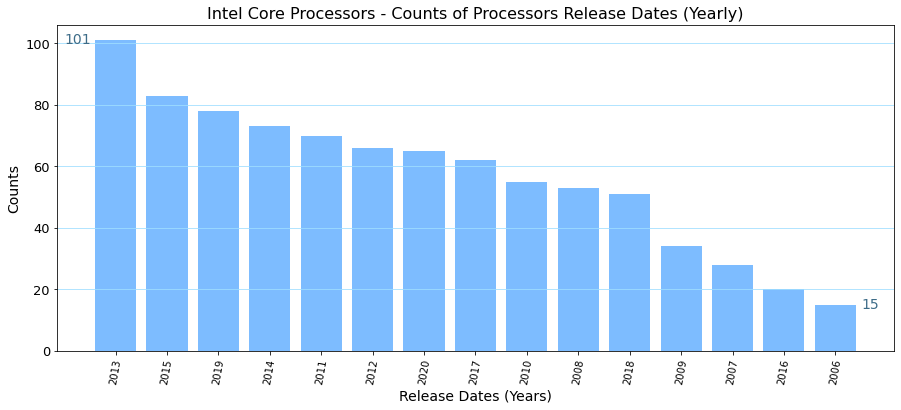

In [12]:
plt.figure(figsize=(15,6))
release_year_counts = intel_core['Release Year'].value_counts()
plt.bar(x=release_year_counts.index, height=release_year_counts, color='#7dbcff')
plt.text(-1,release_year_counts[0]-1.2,release_year_counts[0], fontsize=14, color='#3d6c88')
plt.text(14.5,release_year_counts[-1]-1.2,release_year_counts[-1], fontsize=14, color='#3d6c88')
plt.title('Intel Core Processors - Counts of Processors Release Dates (Yearly)', fontsize=16)
plt.xlabel('Release Dates (Years)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=80)
plt.yticks(fontsize=13)
plt.grid(axis='y', color='#9fdeff')
plt.show()

This must be another **proof** that year **2013** has seen the most launched different Intel Core processors; and that's **more than 100**! Similarly, the year **2006** had the least Core processor launched; that's because it was the 1st year that kind of processor were appeared in the market. Remember that, those were not called as _i-number_ schema; instead, **Core/Core2 Solo/Duo/Quad**.

Now, let's move on to the processors' **base** and **maximum turbo frequencies** they can operate. Revealing the average, standard dev., median, min, max values, etc. are a good start:

In [13]:
round(intel_core[['Max. Turbo Freq.(GHz)', 'Base Freq.(GHz)']].describe(), 2)

,Max. Turbo Freq.(GHz),Base Freq.(GHz)
count,600.00,876.00
mean,3.63,2.50
std,0.66,0.72
min,1.73,0.70
25%,3.20,2.00
50%,3.60,2.53
75%,4.00,3.00
max,5.30,4.30


Notice that, the count values for both **do not match** the total number of Core processors (which was 885); besides, there are even much more missing values for max. turbo frequencies!

At this point, let's show the Core processor(s) whose base frequency is **the highest**, then **the lowest**:

In [14]:
intel_core[intel_core['Base Freq.(GHz)'] == intel_core['Base Freq.(GHz)'].max()]

,Product,Status,Release Date,Cores,Max. Turbo Freq.(GHz),Base Freq.(GHz),Cache(MB),Cache Info,Integrated Graphics,Release Year
18,Core i7-7740X X Series,Discontinued,Q2'17,4,4.5,4.3,8.0,NaN,NaN,2017


In [15]:
intel_core[intel_core['Base Freq.(GHz)'] == intel_core['Base Freq.(GHz)'].min()]

,Product,Status,Release Date,Cores,Max. Turbo Freq.(GHz),Base Freq.(GHz),Cache(MB),Cache Info,Integrated Graphics,Release Year
235,Core i5-1030G4,Launched,Q3'19,4,3.5,0.7,6.0,Intel Smart Cache,Intel Iris Plus Graphics,2019


Consequently, **only 1** processor from both situations! I suppose _Core i7-7740X X Series_ should be one of the highest performing CPUs at the time it was released, but not sure about its price/performance ratio for being high or not. In contrast, _Core i5-1030G4_ has the lowest base frequency ever produced, only just **700 MHz**! However, its turbo frequency could go up to **3.5 GHz**, that's immensely high.

Now, let's reveal the processor(s) whose maximum turbo freq. is **the highest** and **the lowest**:

In [16]:
intel_core[intel_core['Max. Turbo Freq.(GHz)'] == intel_core['Max. Turbo Freq.(GHz)'].max()]

,Product,Status,Release Date,Cores,Max. Turbo Freq.(GHz),Base Freq.(GHz),Cache(MB),Cache Info,Integrated Graphics,Release Year
40,Core i9-10885H,Launched,Q2'20,8,5.3,2.4,16.0,Intel Smart Cache,Intel UHD Graphics,2020
41,Core i9-10980HK,Launched,Q2'20,8,5.3,2.4,16.0,Intel Smart Cache,Intel UHD Graphics,2020
44,Core i9-10900KF,Launched,Q2'20,10,5.3,3.7,20.0,Intel Smart Cache,NaN,2020
45,Core i9-10900K,Launched,Q2'20,10,5.3,3.7,20.0,Intel Smart Cache,Intel UHD 630 Graphics,2020


In [17]:
intel_core[intel_core['Max. Turbo Freq.(GHz)'] == intel_core['Max. Turbo Freq.(GHz)'].min()]

,Product,Status,Release Date,Cores,Max. Turbo Freq.(GHz),Base Freq.(GHz),Cache(MB),Cache Info,Integrated Graphics,Release Year
734,Core i5-430UM,Discontinued,Q2'10,2,1.73,1.2,3.0,Intel Smart Cache,Intel HD Graphics for Previous Gen.,2010


Wow! **Four Core i9 processors** from 10th generation have the capabilities to make their frequencies go up to **5.3 GHz**! I believe they should be very expensive to buy, though. Conversely, The maximum frequency of _Core i5-430UM_ could be **1.73 GHz** at most, the least value among all Core processors!

Above, we said that the total number of Core processors **did not match** the number of available base frequencies. Let's emerge those that Intel did not explain!

In [18]:
intel_core[intel_core['Base Freq.(GHz)'].isnull()]

,Product,Status,Release Date,Cores,Max. Turbo Freq.(GHz),Base Freq.(GHz),Cache(MB),Cache Info,Integrated Graphics,Release Year
60,Core i7-1185G7,Launched,Q3'20,4,4.8,NaN,12.0,Intel Smart Cache,Intel Iris Xe Graphics,2020
61,Core i7-1165G7,Launched,Q3'20,4,4.7,NaN,12.0,Intel Smart Cache,Intel Iris Xe Graphics,2020
62,Core i7-1160G7,Announced,Q3'20,4,4.4,NaN,12.0,Intel Smart Cache,Intel Iris Xe Graphics,2020
214,Core i5-1135G7,Launched,Q3'20,4,4.2,NaN,8.0,Intel Smart Cache,Intel Iris Xe Graphics,2020
215,Core i5-1130G7,Announced,Q3'20,4,4.0,NaN,8.0,Intel Smart Cache,Intel Iris Xe Graphics,2020
389,Core i3-1125G4,Announced,Q3'20,4,3.7,NaN,8.0,Intel Smart Cache,Intel UHD Graphics for 11th Gen Intel Processors,2020
390,Core i3-1120G4,Announced,Q3'20,4,3.5,NaN,8.0,Intel Smart Cache,Intel UHD Graphics for 11th Gen Intel Processors,2020
393,Core i3-1115G4,Launched,Q3'20,2,4.1,NaN,6.0,Intel Smart Cache,Intel UHD Graphics for 11th Gen Intel Processors,2020
394,Core i3-1110G4,Announced,Q3'20,2,3.9,NaN,6.0,Intel Smart Cache,Intel UHD Graphics for 11th Gen Intel Processors,2020


Aha! These are the newly launched or announced Core processors that are from the **11th Gen**, the latest one. This is so interesting and confusing why Intel did not put any value to the base frequencies to these processors, although their maximum turbo freq. are already known! Maybe, we should wait a bit more, like until next month, to see their actual values...

All right, to go even further, let's get **the differences** of these two values among all processors and get the statistics fast: _(Of course, not all differences can be taken due to missing values, and I didn't prefer filling them in)_

In [19]:
intel_core['Freq. Diff.(GHz)'] = round(intel_core['Max. Turbo Freq.(GHz)'] - intel_core['Base Freq.(GHz)'], 2)
round(intel_core['Freq. Diff.(GHz)'].describe(), 2)

count    591.00
mean       1.08
std        0.67
min        0.20
25%        0.60
50%        1.00
75%        1.37
max        3.80
Name: Freq. Diff.(GHz), dtype: float64

So, there exist processors that can increase its clock frequency by **up to 3.8 GHz**; on the other hand, the lowest possible, only just **200 Mhz**!

Let's scrape them all!

In [20]:
intel_core[intel_core['Freq. Diff.(GHz)'] == intel_core['Freq. Diff.(GHz)'].max()]

,Product,Status,Release Date,Cores,Max. Turbo Freq.(GHz),Base Freq.(GHz),Cache(MB),Cache Info,Integrated Graphics,Release Year,Freq. Diff.(GHz)
66,Core i7-10810U,Launched,Q2'20,6,4.9,1.1,12.0,Intel Smart Cache,Intel UHD Graphics,2020,3.8


In [21]:
freq_diff_min = intel_core[intel_core['Freq. Diff.(GHz)'] == intel_core['Freq. Diff.(GHz)'].min()]
print(freq_diff_min.shape[0], "processors with the least frequency diff.")
freq_diff_min.head()

14 processors with the least frequency diff.


,Product,Status,Release Date,Cores,Max. Turbo Freq.(GHz),Base Freq.(GHz),Cache(MB),Cache Info,Integrated Graphics,Release Year,Freq. Diff.(GHz)
18,Core i7-7740X X Series,Discontinued,Q2'17,4,4.5,4.3,8.0,NaN,NaN,2017,0.2
19,Core i5-7640X X Series,Discontinued,Q2'17,4,4.2,4.0,6.0,NaN,NaN,2017,0.2
22,Core i7-6850K,Discontinued,Q2'16,6,3.6,3.4,15.0,Intel Smart Cache,NaN,2016,0.2
23,Core i7-6800K,Discontinued,Q2'16,6,3.6,3.4,15.0,Intel Smart Cache,NaN,2016,0.2
25,Core i7-5930K,Discontinued,Q3'14,6,3.7,3.5,15.0,Intel Smart Cache,NaN,2014,0.2


The processor _Core i7-10810U_ has **the biggest difference** between the maximum freq. and the base, this amount is so enormous, right?

For the processors with the least difference, there are not just one, but **14 processors**! _(Again, I just showed the first five of them due to space limitations)_

OK, taking them all for a bigger picture, let's generate another **bar chart** to count and analyze which difference value is the most appeared one:

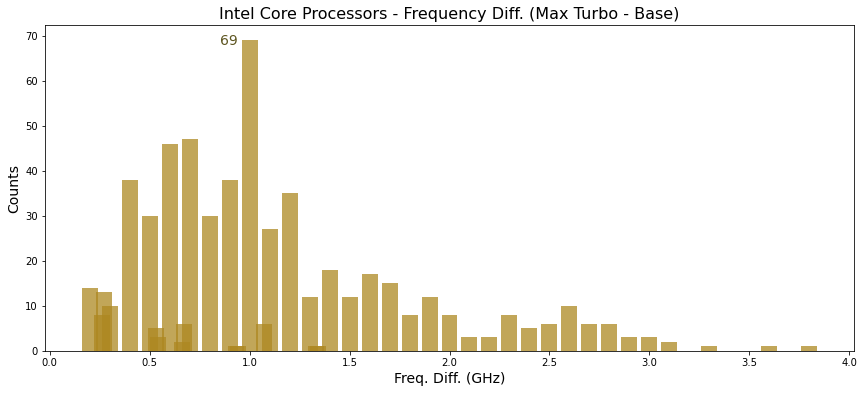

In [22]:
plt.figure(figsize=(14.5,6))
freq_diff_top20 = intel_core['Freq. Diff.(GHz)'].value_counts()
plt.bar(x=freq_diff_top20.index, height=freq_diff_top20, width=0.08, alpha=0.75, color='#ad8821')
plt.text(0.85, freq_diff_top20.max()-1,freq_diff_top20.max(), fontsize=14, color='#5d5520')
plt.title('Intel Core Processors - Frequency Diff. (Max Turbo - Base)', fontsize=16)
plt.xlabel('Freq. Diff. (GHz)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

Hmmm, from this chart, we can imply that there are **69 Core processors** that can increase their frequency by **1 GHz** at most; the most common value among all of them! Nevertheless, one can combine those values together and realize that the most frequency-increasing changes lie between **0.4 to 1.2 GHz**.

Enough of this, let's take another feature now: **The number of cores**. While observing the dataset before the analyses, I assure you that any Core processor could contain a single core, but could increase up to **18 Cores**. Hence, which processors could have such a high number of cores?

In [23]:
intel_core[intel_core['Cores'] == 18]

,Product,Status,Release Date,Cores,Max. Turbo Freq.(GHz),Base Freq.(GHz),Cache(MB),Cache Info,Integrated Graphics,Release Year,Freq. Diff.(GHz)
0,Core i9-10980XE Extreme Edition,Launched,Q4'19,18,4.6,3.0,24.75,Intel Smart Cache,NaN,2019,1.6
4,Core i9-9980XE Extreme Edition,Launched,Q4'18,18,4.4,3.0,24.75,Intel Smart Cache,NaN,2018,1.4
11,Core i9-7980XE Extreme Edition,Discontinued,Q3'17,18,4.2,2.6,24.75,NaN,NaN,2017,1.6


Ah, I should've known! The **Extreme Edition Core processors from i9 tier**, the highest-ends in their own generations!

In general, how are all these core counts distributed, in descending order?

In [24]:
core_counts = intel_core['Cores'].value_counts()
for x in range(len(core_counts)):
    print("{} cores <-- {} processors".format(core_counts.index[x], core_counts.iloc[x]))

2 cores <-- 427 processors
4 cores <-- 325 processors
6 cores <-- 66 processors
8 cores <-- 29 processors
10 cores <-- 13 processors
1 cores <-- 12 processors
18 cores <-- 3 processors
14 cores <-- 3 processors
12 cores <-- 3 processors
16 cores <-- 2 processors
5 cores <-- 2 processors


Well, as you can see, **2 cores** and **4 cores** are the most common configurations. Such processors with **more than 10 cores** and the odd number, **5 cores** look like very uncommon!

OK, I'd like to create a visualization that is a little bit fancy! **A stacked bar chart** that shows the distribution of the number of cores. Check below for what it looks like...

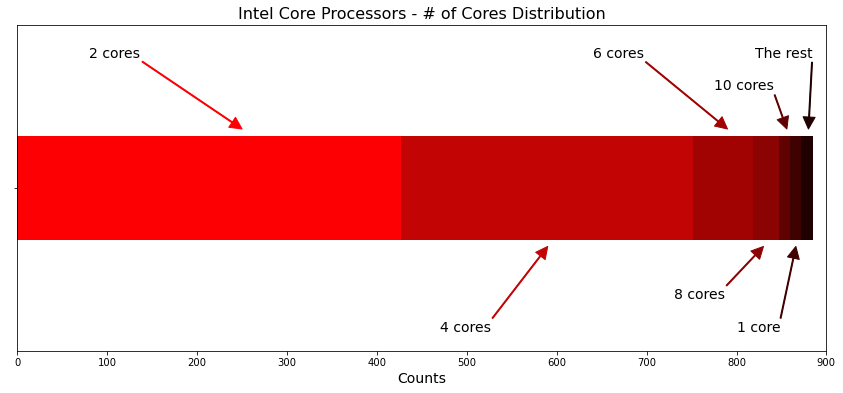

In [25]:
core_counts = intel_core['Cores'].astype(str)
cc = core_counts.value_counts()
plt.figure(figsize=(14.5,6))
plt.axis([0,900,-1.25,1.25])
plt.barh(y=" ", width=cc[0], color='#fc0004')
plt.barh(y=" ", width=cc[1], left=cc[0], color='#c20404')
plt.barh(y=" ", width=cc[2], left=sum(cc[0:2]), color='#a10202')
plt.barh(y=" ", width=cc[3], left=sum(cc[0:3]), color='#8c0303')
plt.barh(y=" ", width=cc[4], left=sum(cc[0:4]), color='#610202')
plt.barh(y=" ", width=cc[5], left=sum(cc[0:5]), color='#400101')
plt.barh(y=" ", width=sum(cc[6:]), left=sum(cc[0:6]), color='#200001')
plt.annotate("2 cores", xy=(250,0.45), xytext=(80,1), size=14, arrowprops={'width':1, 'color':'#fc0004'})
plt.annotate("4 cores", xy=(590,-0.45), xytext=(470,-1.1), size=14, arrowprops={'width':1, 'color':'#c20404'})
plt.annotate("6 cores", xy=(790,0.45), xytext=(640,1), size=14, arrowprops={'width':1, 'color':'#a10202'})
plt.annotate("8 cores", xy=(830,-0.45), xytext=(730,-0.85), size=14, arrowprops={'width':1, 'color':'#8c0303'})
plt.annotate("10 cores", xy=(856,0.45), xytext=(775,0.75), size=14, arrowprops={'width':1, 'color':'#610202'})
plt.annotate("1 core", xy=(866,-0.45), xytext=(800,-1.1), size=14, arrowprops={'width':1, 'color':'#400101'})
plt.annotate("The rest", xy=(880,0.45), xytext=(820,1.0), size=14, arrowprops={'width':1, 'color':'#200001'})
plt.title("Intel Core Processors - # of Cores Distribution", fontsize=16)
plt.xlabel("Counts", fontsize=14)
plt.show()

This is so pleasant, right? Very explanatory, and nothing to say more over that.

Continuing with another feature, let's obtain the quick statistics for **total cache size (in MB)** of all Core processors:

In [26]:
round(intel_core['Cache(MB)'].describe(), 2)

count    885.00
mean       6.14
std        3.96
min        1.00
25%        3.00
50%        6.00
75%        8.00
max       25.00
Name: Cache(MB), dtype: float64

This indicates that, around **6 MB** cache size is the most preferable one, as the median value, plus the so-close mean value verify that mutually.

As previously above analyses, I'd like to see which processor keeps the highest amount of cache size, i.e. **25 MB**:

In [27]:
intel_core[intel_core['Cache(MB)'] == 25]

,Product,Status,Release Date,Cores,Max. Turbo Freq.(GHz),Base Freq.(GHz),Cache(MB),Cache Info,Integrated Graphics,Release Year,Freq. Diff.(GHz)
20,Core i7-6950X Extreme Edition,Discontinued,Q2'16,10,3.5,3.0,25.0,NaN,NaN,2016,0.5


Another Extreme Edition Core processor, _Core i7-6950X,_ got the award in this category!

And, the processors with **the least** cache size are...

In [28]:
intel_core[intel_core['Cache(MB)'] == 1]

,Product,Status,Release Date,Cores,Max. Turbo Freq.(GHz),Base Freq.(GHz),Cache(MB),Cache Info,Integrated Graphics,Release Year,Freq. Diff.(GHz)
875,Core2 Solo U2200,Discontinued,Q3'07,1,NaN,1.20,1.0,L2 Cache,NaN,2007,NaN
876,Core2 Solo U2100,Discontinued,Q3'07,1,NaN,1.06,1.0,L2 Cache,NaN,2007,NaN


Oh, the good ol' **Core2 Solo** processors, back in 2007! I don't understand why Intel had chosen this lowest amount ever...

Now, let's carry out another fascinating analysis: This time, instead of visualization, a **cross tabulation** could be great to compare the cache sizes against the **cache description/info**, for a better insight.

_Below, I performed some data wrangling beforehand for the corresponding column, to avoid NaN values, converting them to 'No Cache Info'._

In [29]:
def check_cache_info(info):
    if type(info) == float:
        return "No Cache Info"
    return info
intel_core['Cache Info'] = intel_core['Cache Info'].apply(check_cache_info)
pd.crosstab(intel_core['Cache(MB)'], intel_core['Cache Info'])

Cache Info,Intel Smart Cache,L2 Cache,L3 Cache,No Cache Info
Cache(MB),,,,
1.00,0,2,0,0
2.00,0,51,0,0
3.00,151,21,4,27
4.00,106,28,3,29
6.00,147,32,0,26
8.00,106,5,0,12
8.25,0,0,1,0
9.00,23,0,0,4
10.00,2,0,0,0


This explains a lot! The most common cache combination is **Intel Smart Cache with 3 MB size**. The runner-up is again **Intel Smart Cache** with higher size, **6 MB**. Next, the same one with **4** and **8 MB** cache sizes, respectively. With human eyes, one can see that _Intel Smart Cache_ is the most appearing cache type.

**L2 and L3 Caches** seem to be from the older technology that Intel does not mind using them any more in the latest generations. Likewise, it's hard to say if the processors with undescribed cache info have low performance or not...

Lastly, let's inspect the feature **Integrated Graphics**. It is certain that most Intel Core processors come along with the graphical components when it's enough to use without a graphic card installed to motherboards.

There are some definite namings for these graphics, such as _Intel UHD, Intel HD and Intel Iris._ Delving into more details, specific numbers could be given ( 3 or 4 digits) to distinguish them from each other and assess how powerful these graphic components are. Here are some examples below:

* **Intel UHD Graphics**: 630, 620, 615, ...
* **Intel HD Graphics**: 2000, 3000, 4000, 4600, 5000, 6000, 520, 530, 620, ...
* **Intel Iris**: _Plus_ or _Pro_ as prefix, then 540, 550, 640, 645, ...

For this reason, it is much more suitable to **categorize them all**. However, NOT all Core processors contain any integrated graphics, thus these need to be given as _No Category,_ as I did similarly while takinga look at Cache Info.

Enough talking, let's compose another feature that holds the categorical values of Integrated Graphics in Core CPUs, then count them:

In [30]:
def check_graphic_info(info):
    if type(info) == float:
        return "No Integrated Graphics"
    return info
def get_graphic_cat(info):
    if 'Intel UHD' in info or 'UHD Intel' in info:
        return 'Intel UHD'
    elif 'Intel HD' in info:
        return 'Intel HD'
    elif 'Intel Iris' in info:
        return 'Intel Iris'
    else:
        return 'No Category'
intel_core['Integrated Graphics'] = intel_core['Integrated Graphics'].apply(check_graphic_info)
intel_core['Integrated Grap. Cat.'] = intel_core['Integrated Graphics'].apply(get_graphic_cat)

In [42]:
igc = intel_core['Integrated Grap. Cat.'].value_counts()
for i in range(len(igc)):
    print("{}\t{}\t{:.2f} percent".format(igc.index[i], igc[i], igc[i] / len(intel_core) * 100))

Intel HD	416	47.01 percent
No Category	243	27.46 percent
Intel UHD	142	16.05 percent
Intel Iris	84	9.49 percent


As a result, **Intel HD** integrated graphics is the most dominant among all Core processors. Remarkably, **243** processors do not come with any graphical component, that's more than a quarter of all.

Time to make another visualization for this analysis with **stacked bar chart**, similarly above:

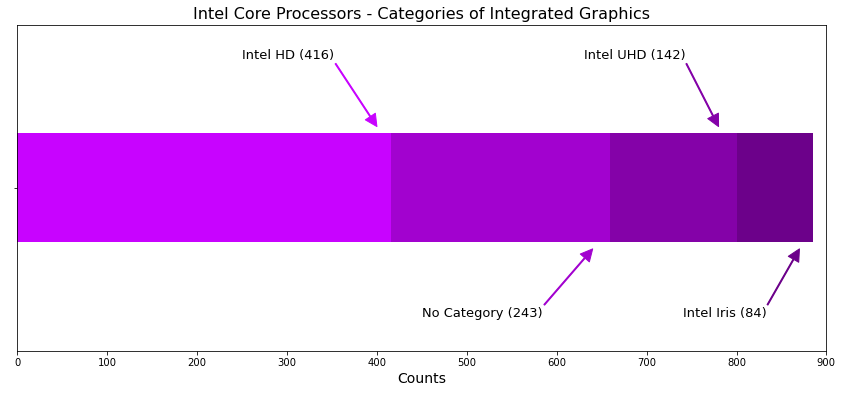

In [32]:
igc = intel_core['Integrated Grap. Cat.'].value_counts()
plt.figure(figsize=(14.5,6))
plt.axis([0,900,-1.2,1.2])
plt.barh(y=" ", width=igc[0], color='#c803ff')
plt.barh(y=" ", width=igc[1], left=igc[0], color='#a202cf')
plt.barh(y=" ", width=igc[2], left=igc[0]+igc[1], color='#8402a8')
plt.barh(y=" ", width=igc[3], left=igc[0]+igc[1]+igc[2], color='#6c018a')
plt.annotate("{} ({})".format(igc.index[0], igc[0]), xy=(400,0.45), xytext=(250,0.95), size=13, 
             arrowprops={'width':1, 'color':'#c803ff'})
plt.annotate("{} ({})".format(igc.index[1], igc[1]), xy=(640,-0.45), xytext=(450,-0.95), size=13, 
             arrowprops={'width':1, 'color':'#a202cf'})
plt.annotate("{} ({})".format(igc.index[2], igc[2]), xy=(780,0.45), xytext=(630,0.95), size=13, 
             arrowprops={'width':1, 'color':'#8402a8'})
plt.annotate("{} ({})".format(igc.index[3], igc[3]), xy=(870,-0.45), xytext=(740,-0.95), size=13, 
             arrowprops={'width':1, 'color':'#6c018a'})
plt.title("Intel Core Processors - Categories of Integrated Graphics", fontsize=16)
plt.xlabel("Counts", fontsize=14)
plt.show()

### And, this concludes the 1st part of analyses of Intel Core processsors...

### But, believe me or not, we've made lots of analyses even with a limited number of features; allowing us to gain many insights, right?

### OK then, see you in the next part!